In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sym
import matplotlib.animation as anim

In [115]:
theta0 = np.pi/4
r0 = [0., 0., theta0, 0.]
t = np.linspace(0, 8, 1000)
m = 0.1 
R = 0.1
d = 0.3 
g = 9.81
I0 = (0.25*m*R**2) + m*d**2
Iz =0.5*m*R**2
psiP= 400
Mom_phi =Iz*psiP*np.cos(theta0)
Mom_psi = Iz*psiP

In [116]:
def System2(r,t):
    phi,psi,theta,thetaP = r
    
    phiP = (Mom_phi-Iz*psiP*np.cos(theta))/((I0*np.sin(theta)**2)+Iz*np.cos(theta)**2)
    #thetaP = ((Mom_psi/Iz)-psiP)/np.cos(theta)
    thetaPP = ((phiP**2)*np.sin(theta)*np.cos(theta)*(I0-Iz)-(phiP*psiP*Iz*np.sin(theta)+m*g*d*np.sin(theta)))/I0
    return [phiP,psiP,thetaP,thetaPP]

In [117]:
sol = odeint(System2, r0, t)

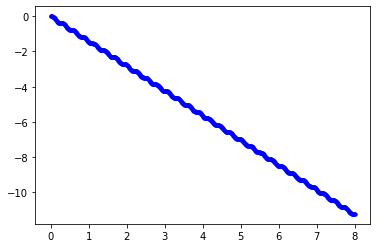

In [118]:
plt.scatter(t,sol[:,0],marker='.',color='b')

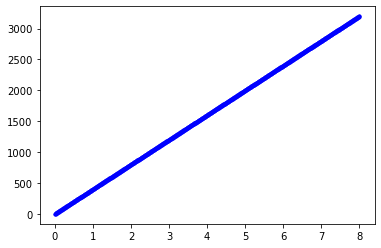

In [119]:
plt.scatter(t,sol[:,1],marker='.',color='b')

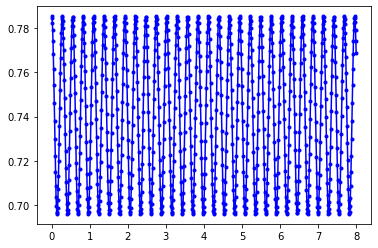

In [127]:
plt.plot(t,sol[:,2],marker='.',color='b')

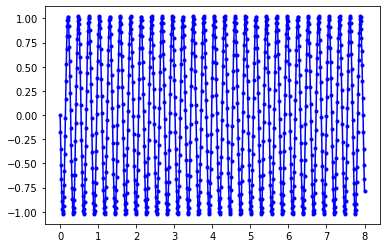

In [126]:
plt.plot(t,sol[:,3],marker='.',color='b')

In [124]:
x = d * np.sin(sol[:,2]) * np.cos(sol[:,1])
y = d * np.sin(sol[:,2]) * np.sin(sol[:,1])
z = d * np.cos(sol[:,2])

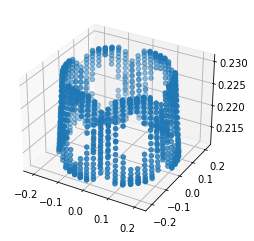

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, label='parametric curve')

In [138]:
l0=sol[:,0]
Omega = (l0[0] - l0[-1]) / (t[-1] - t[0])
print("velocidad de precesion: ",Omega)                  
            

velocidad de precesion:  1.402987520383821
